# Imports

In [1]:
import sys
import io

import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import StratifiedShuffleSplit

import input_data

# Helper functions

In [2]:
def stats(y_true, y_pred):
    
    accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
    
    print ("Accuracy: {}".format(accuracy))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    See: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    
    plt.figure(figsize=(20,10))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

# Read Data

In [3]:
features = input_data.numeric_features
label = input_data.label_column_name

In [4]:
train = pd.read_csv("./data/train.csv.gz", nrows=None)
test = pd.read_csv("./data/test.csv.gz", nrows=None)
validation = pd.read_csv("./data/validation.csv.gz", nrows=None)

In [5]:
X_train = train[features]
y_train = train[label]

X_test = test[features]
y_test = test[label]

X_validation = validation[features]
y_validation = validation[label]

# Random Forest Classifier

In [8]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dvalidation = xgb.DMatrix(data=X_validation, label=y_validation)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [9]:
param = {'eta':0.01, 'silent':False, 'objective':'binary:logistic'}
num_round = 20

In [10]:
model = xgb.train(param, dtrain, num_round, verbose_eval=True, 
                  evals=[(dtrain, "train"), (dvalidation, "validation")])

[0]	train-error:0.002302	validation-error:0.002282
[1]	train-error:0.002302	validation-error:0.002283
[2]	train-error:0.002302	validation-error:0.002283
[3]	train-error:0.002302	validation-error:0.002283
[4]	train-error:0.002302	validation-error:0.002283
[5]	train-error:0.002302	validation-error:0.002283
[6]	train-error:0.002302	validation-error:0.002283
[7]	train-error:0.002302	validation-error:0.002283
[8]	train-error:0.002302	validation-error:0.002283
[9]	train-error:0.002302	validation-error:0.002283
[10]	train-error:0.002302	validation-error:0.002283
[11]	train-error:0.002302	validation-error:0.002283
[12]	train-error:0.002302	validation-error:0.002285
[13]	train-error:0.002302	validation-error:0.002285
[14]	train-error:0.002302	validation-error:0.002285
[15]	train-error:0.002302	validation-error:0.002285
[16]	train-error:0.002302	validation-error:0.002285
[17]	train-error:0.002302	validation-error:0.002285
[18]	train-error:0.002302	validation-error:0.002285
[19]	train-error:0.002

In [11]:
y_pred = model.predict(dtest)

In [12]:
THRESHOLD = 0.5
y_pred_classes = y_pred > THRESHOLD

Confusion matrix, without normalization
[[783225   2215]
 [    16 194144]]


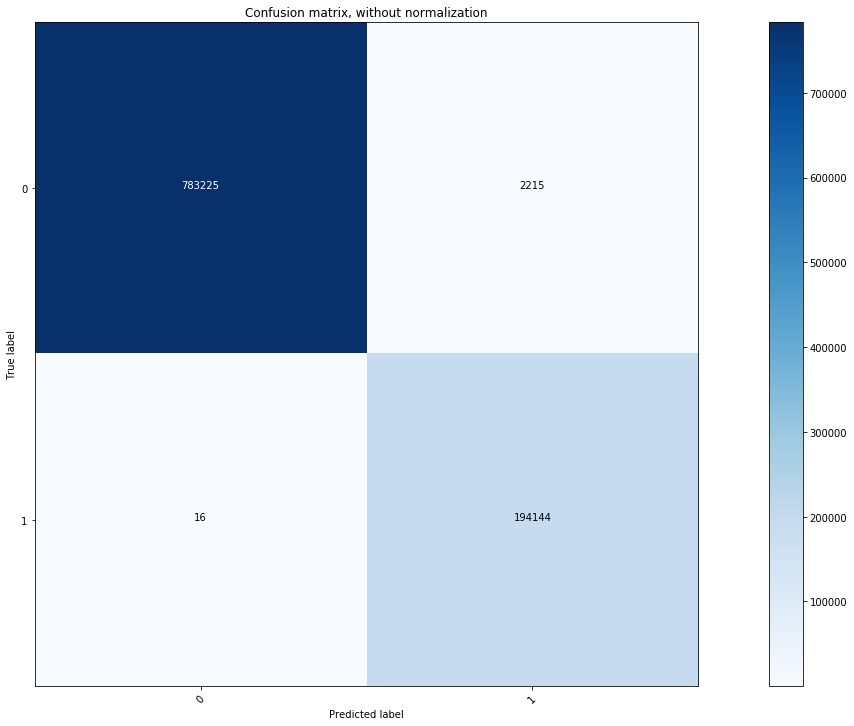

In [13]:
cnf_matrix = confusion_matrix(y_test.values, y_pred_classes)
plot_confusion_matrix(cnf_matrix, classes=[0,1], 
                      title='Confusion matrix, without normalization')

In [14]:
stats(y_true=y_test, y_pred=y_pred_classes)

Accuracy: 0.997722539812
